In [1]:
import numpy as np
import pandas as pd
import re
import whois
import google
from bs4 import BeautifulSoup
import urllib.request

In [2]:
# urldata =pd.read_csv("phishing-urls.csv")
urldata =pd.read_csv("url.csv")
urldata.tail(10)

,url,label
97,https://www.architecticastartups.com/,good
98,https://www.techsimplus.com/TechSim_Internship...,good
99,https://www.preservearticles.com/short-essays/...,good
100,https://www.kopykitab.com/blog/category/questi...,good
101,http://192.168.43.112/virus.exe,bad
102,http://172.149.1.61/payload.exe,bad
103,http://signin.paypal.com@10.19.32.4/o,bad
104,http://63.17.167.23/pc/verification.htm?=https...,bad
105,http://example.com/redirect.php?dest=https://1...,bad
106,http://https-items.com,bad


In [3]:
urldata[urldata.label=='bad']
# urldata= urldata.rename(columns= {"Domain":"url"})
urldata.head(10)

,url,label
0,https://www.google.com/,good
1,https://www.amazon.in/gp/product/B07N6LN57W,good
2,http://aot.edu.in/campus-communities/,good
3,https://abc.com/,good
4,https://community.letsupgrade.in/group/blockchain,good
5,https://drive.google.com/drive/u/0/,good
6,https://www.educative.io/courses/natural-langu...,good
7,https://edusaint.com/school/#/learnsection,good
8,https://www.flipkart.com/,good
9,https://github.com/roubis09/BloodDonationWebsi...,good


In [4]:
from urllib.parse import urlparse
from tld import get_tld

In [5]:
urlparse("http://www.aot.edu.in/students/admin/")

ParseResult(scheme='http', netloc='www.aot.edu.in', path='/students/admin/', params='', query='', fragment='')

In [6]:
# Protocol
def Protocol(url):
    x= urlparse(url).scheme
    if x=='http':
        return 1
    elif x=='https':
        return 0
    
urldata['protocol']= urldata['url'].apply(lambda i: Protocol(i))

In [7]:
# length 0f url
urldata['length']= urldata['url'].apply(lambda i: len(i))

In [8]:
# First Directory Length
def fd_length(url):
    urlpath=  urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0
urldata['fd_length'] = urldata['url'].apply(lambda i: fd_length(i))

In [9]:
get_tld("https://imo.im/",fail_silently=True)

'im'

In [10]:
urldata.tail(10)

,url,label,protocol,length,fd_length
96,http://www.saha.ac.in/web/previous-programs,good,1,43,3
97,https://www.architecticastartups.com/,good,0,37,0
98,https://www.techsimplus.com/TechSim_Internship...,good,0,72,18
99,https://www.preservearticles.com/short-essays/...,good,0,67,12
100,https://www.kopykitab.com/blog/category/questi...,good,0,83,4
101,http://192.168.43.112/virus.exe,bad,1,31,9
102,http://172.149.1.61/payload.exe,bad,1,31,11
103,http://signin.paypal.com@10.19.32.4/o,bad,1,37,1
104,http://63.17.167.23/pc/verification.htm?=https...,bad,1,64,2
105,http://example.com/redirect.php?dest=https://1...,bad,1,58,12


In [11]:
urldata['count-']= urldata['url'].apply(lambda i: i.count('-'))

In [12]:
urldata['count@']= urldata['url'].apply(lambda i: i.count('@'))

In [13]:
urldata['count?']= urldata['url'].apply(lambda i: i.count('?'))

In [14]:
urldata['count%']= urldata['url'].apply(lambda i: i.count('%'))

In [15]:
urldata['count.']= urldata['url'].apply(lambda i: i.count('.'))

In [16]:
urldata['count=']= urldata['url'].apply(lambda i: i.count('='))

In [21]:
urldata['count-http']= urldata['url'].apply(lambda i: i.count('http'))

In [22]:
urldata['count-https']= urldata['url'].apply(lambda i: i.count('https'))

In [23]:
urldata['count-www']= urldata['url'].apply(lambda i: i.count('www'))

In [24]:
def digit_count(url):
    digit= 0
    for i in url:
        if i.isnumeric():
            digit+=1
    return digit
urldata['count-digits']= urldata['url'].apply(lambda i: digit_count(i))

In [25]:
urldata['count-/']= urldata['url'].apply(lambda i: urlparse(i).path.count('/'))

In [26]:
def letter_count(url):
    letter= 0
    for i in url:
        if i.isalpha():
            letter+=1
    return letter
urldata['count-letter']= urldata['url'].apply(lambda i: letter_count(i))

In [27]:
urldata.tail(10)

,url,label,protocol,length,fd_length,count-,count@,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-/,count-letter
69,http://yahoo.co.in/email_open_log_pic.php,bad,1,41,22,0,0,0,0,3,0,1,0,0,0,1,31
70,http://staticmail.000webhostapp.com,bad,1,35,0,0,0,0,0,2,0,1,0,0,3,0,27
71,http://dj00.co.vu/css/,bad,1,22,3,0,0,0,0,2,0,1,0,0,2,2,13
72,https://www.rhino.com//features/75645p.html,good,0,43,0,0,0,0,0,3,0,1,1,1,5,3,29
73,http://http-abcd.com,bad,1,20,0,1,0,0,0,1,0,2,0,0,0,0,15
74,http://https-efgh.com,bad,1,21,0,1,0,0,0,1,0,2,1,0,0,0,16
75,https://oakvilleconferencecentre.com/lpaor/Ion...,bad,0,60,5,0,0,0,0,2,0,1,1,0,0,3,52
76,http://abhishekgroup.co.in/wp-http/hanmail/log...,bad,1,210,7,1,0,1,0,3,3,2,0,0,80,3,113
77,http://abhishekgroup.co.in/wp-http/hanmail/log...,bad,1,210,7,1,0,1,0,3,3,2,0,0,80,3,113
78,https://aguilashd-iuwvuqaoi.vercel.app/,bad,0,39,0,1,0,0,0,2,0,1,1,0,0,1,32


In [28]:
# url is ip address or not
def having_ip_address(url):
    match=re.search('(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  #IPv4
                    '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)'  #IPv4 in hexadecimal
                    '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}',url)     #Ipv6
    if match:
        #print match.group()
        return 1
    else:
        #print 'No matching pattern found'
        return 0

urldata['use_of_ip']= urldata['url'].apply(lambda i: having_ip_address(i))

In [29]:
urldata.head(10)

,url,label,protocol,length,fd_length,count-,count@,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-/,count-letter,use_of_ip
0,https://www.google.com/,good,0,23,0,0,0,0,0,2,0,1,1,1,0,1,17,0
1,https://www.amazon.in/gp/product/B07N6LN57W,good,0,43,2,0,0,0,0,2,0,1,1,1,5,3,30,0
2,http://aot.edu.in/campus-communities/,good,1,37,18,1,0,0,0,2,0,1,0,0,0,2,29,0
3,https://abc.com/,good,0,16,0,0,0,0,0,1,0,1,1,0,0,1,11,0
4,https://community.letsupgrade.in/group/blockchain,good,0,49,5,0,0,0,0,2,0,1,1,0,0,2,42,0
5,https://drive.google.com/drive/u/0/,good,0,35,5,0,0,0,0,2,0,1,1,0,1,4,25,0
6,https://www.educative.io/courses/natural-langu...,good,0,75,7,3,0,0,0,2,0,1,1,1,4,3,60,0
7,https://edusaint.com/school/#/learnsection,good,0,42,6,0,0,0,0,1,0,1,1,0,0,2,34,0
8,https://www.flipkart.com/,good,0,25,0,0,0,0,0,2,0,1,1,1,0,1,19,0
9,https://github.com/roubis09/BloodDonationWebsi...,good,0,55,8,0,0,0,0,1,0,1,1,0,2,2,47,0


In [30]:
# To check any shortening service is used or not
def shortening_service(url):
    match=re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                    'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                    'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                    'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                    'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                    'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                    'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|tr\.im|link\.zip\.net',url)
    if match:
        return 1
    else:
        return 0

urldata['shortening_service'] = urldata['url'].apply(shortening_service)

In [31]:
# HTTPS TOKEN IN URL
def https_token(url):
    match=re.search('https://|http://',url)
    if match.start(0)==0:
        url=url[match.end(0):]
    
    match=re.search('http|https',url)
    if match:
        return 1
    else:
        return 0
    
urldata['https_token'] = urldata['url'].apply(lambda i: https_token(i))

In [32]:
urldata.tail(10)

,url,label,protocol,length,fd_length,count-,count@,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-/,count-letter,use_of_ip,shortening_service,https_token
69,http://yahoo.co.in/email_open_log_pic.php,bad,1,41,22,0,0,0,0,3,0,1,0,0,0,1,31,0,0,0
70,http://staticmail.000webhostapp.com,bad,1,35,0,0,0,0,0,2,0,1,0,0,3,0,27,0,0,0
71,http://dj00.co.vu/css/,bad,1,22,3,0,0,0,0,2,0,1,0,0,2,2,13,0,0,0
72,https://www.rhino.com//features/75645p.html,good,0,43,0,0,0,0,0,3,0,1,1,1,5,3,29,0,0,0
73,http://http-abcd.com,bad,1,20,0,1,0,0,0,1,0,2,0,0,0,0,15,0,0,1
74,http://https-efgh.com,bad,1,21,0,1,0,0,0,1,0,2,1,0,0,0,16,0,0,1
75,https://oakvilleconferencecentre.com/lpaor/Ion...,bad,0,60,5,0,0,0,0,2,0,1,1,0,0,3,52,0,0,0
76,http://abhishekgroup.co.in/wp-http/hanmail/log...,bad,1,210,7,1,0,1,0,3,3,2,0,0,80,3,113,0,0,1
77,http://abhishekgroup.co.in/wp-http/hanmail/log...,bad,1,210,7,1,0,1,0,3,3,2,0,0,80,3,113,0,0,1
78,https://aguilashd-iuwvuqaoi.vercel.app/,bad,0,39,0,1,0,0,0,2,0,1,1,0,0,1,32,0,0,0


In [33]:
# To check Domain name is included in the url
def abnormal_url_sub(domain,url):
    try:
        try:
            hostname=domain["domain_name"].lower()
        except:
            hostname=domain["domain_name"][0].lower()
    except:
        return 1
    
    #print(hostname)
    match=re.search(hostname,url)
    if match:
        #print(0)
        return 0
    else:
        #print(1)
        return 1
    
def abnormal_url_main(url):
    dns = 0
    try:
        domain_name = whois.whois(url)
        # print(domain_name["domain_name"])
    except:
        dns = 1
        #print('1dns')
        
    if dns == 1:
        return 1
    else:
        return abnormal_url_sub(domain_name,url)
    
urldata['include_domain']= urldata['url'].apply(lambda i: abnormal_url_main(i))

Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket


In [34]:
urldata.tail(17)

,url,label,protocol,length,fd_length,count-,count@,count?,count%,count.,...,count-http,count-https,count-www,count-digits,count-/,count-letter,use_of_ip,shortening_service,https_token,include_domain
62,http://binary-project.com/cha/chase/home/actio...,bad,1,51,3,1,0,0,0,2,...,1,0,0,0,4,41,0,1,0,0
63,https://goo.gl/JVVHeA,bad,0,21,6,0,0,0,0,1,...,1,1,0,0,1,16,0,1,0,1
64,http://bit.ly/2oOkGv9,bad,1,21,7,0,0,0,0,1,...,1,0,0,2,1,14,0,1,0,0
65,http://ginatringali.com,bad,1,23,0,0,0,0,0,1,...,1,0,0,0,0,19,0,0,0,1
66,http:////al/alibaba21012015/alibaba21012015/66...,bad,1,58,0,0,0,0,0,1,...,1,0,0,19,6,29,0,0,0,1
67,http://restauracjagreenpepper.pl//kmd/image.html,bad,1,48,0,0,0,0,0,2,...,1,0,0,0,3,40,0,0,0,1
68,http://www.sagittariusglobal.com//portal/cache...,bad,1,63,0,0,0,0,0,3,...,1,0,1,0,5,52,0,0,0,0
69,http://yahoo.co.in/email_open_log_pic.php,bad,1,41,22,0,0,0,0,3,...,1,0,0,0,1,31,0,0,0,0
70,http://staticmail.000webhostapp.com,bad,1,35,0,0,0,0,0,2,...,1,0,0,3,0,27,0,0,0,0
71,http://dj00.co.vu/css/,bad,1,22,3,0,0,0,0,2,...,1,0,0,2,2,13,0,0,0,1


In [35]:
from bs4 import BeautifulSoup
import urllib.request
def web_traffic(url):
    try:
        rank = BeautifulSoup(urllib.request.urlopen("http://data.alexa.com/data?cli=10&dat=s&url=" + url).read(), "xml").find("REACH")['RANK']
    except TypeError:
        return 1
    rank= int(rank)
    if (rank<100000):
        return 0
    else:
        return 2
    
urldata['web_traffic']= urldata['url'].apply(lambda i: web_traffic(i))

In [36]:
urldata.head(20)

,url,label,protocol,length,fd_length,count-,count@,count?,count%,count.,...,count-https,count-www,count-digits,count-/,count-letter,use_of_ip,shortening_service,https_token,include_domain,web_traffic
0,https://www.google.com/,good,0,23,0,0,0,0,0,2,...,1,1,0,1,17,0,0,0,0,0
1,https://www.amazon.in/gp/product/B07N6LN57W,good,0,43,2,0,0,0,0,2,...,1,1,5,3,30,0,0,0,0,0
2,http://aot.edu.in/campus-communities/,good,1,37,18,1,0,0,0,2,...,0,0,0,2,29,0,0,0,0,2
3,https://abc.com/,good,0,16,0,0,0,0,0,1,...,1,0,0,1,11,0,0,0,0,0
4,https://community.letsupgrade.in/group/blockchain,good,0,49,5,0,0,0,0,2,...,1,0,0,2,42,0,0,0,0,2
5,https://drive.google.com/drive/u/0/,good,0,35,5,0,0,0,0,2,...,1,0,1,4,25,0,0,0,0,0
6,https://www.educative.io/courses/natural-langu...,good,0,75,7,3,0,0,0,2,...,1,1,4,3,60,0,0,0,0,0
7,https://edusaint.com/school/#/learnsection,good,0,42,6,0,0,0,0,1,...,1,0,0,2,34,0,1,0,0,2
8,https://www.flipkart.com/,good,0,25,0,0,0,0,0,2,...,1,1,0,1,19,0,1,0,0,0
9,https://github.com/roubis09/BloodDonationWebsi...,good,0,55,8,0,0,0,0,1,...,1,0,2,2,47,0,0,0,0,0


In [37]:
# Domain Registration Length
import whois
from datetime import datetime
import time
def domain_registration_length_sub(domain):
    expiration_date = domain.expiration_date
    today = time.strftime('%Y-%m-%d')
    today = datetime.strptime(today, '%Y-%m-%d')
    if expiration_date is None:
        return 0
    elif type(expiration_date) is list or type(today) is list :
        return -1             #If it is a type of list then we can't select a single value from list. So,it is regarded as suspected website  
    else:
        registration_length = abs((expiration_date - today).days)
        if registration_length>3000:
            registration_length=0
        return int(registration_length/30)
#         if registration_length / 365 <= 1:
#             return 1
#         else:
#             return 0
        
def domain_registration_length_main(domain):
    dns = 0
    try:
        domain_name = whois.whois(domain)
    except:
        dns = 1
        
    if dns == 1:
        return 0
    else:
        return domain_registration_length_sub(domain_name)
    
urldata['registration_length']= urldata['url'].apply(lambda i: domain_registration_length_main(i))

Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket


In [38]:
urldata.head(20)
urldata.shape

(79, 23)

In [39]:
# Age of Domain
def age_of_domain_sub(domain):
    creation_date = domain.creation_date
    expiration_date = domain.expiration_date
    if ((expiration_date is None) or (creation_date is None)):
        return 0
    elif ((type(expiration_date) is list) or (type(creation_date) is list)):
        return -1
    else:
        ageofdomain = abs((expiration_date - creation_date).days)
        if ageofdomain>9600:
            ageofdomain=0
            
        return int(ageofdomain/30)
#         if ((ageofdomain/30) < 6):
#             return 1
#         else:
#             return 0
        
def age_of_domain_main(domain):
    dns = 0
    try:
        domain_name = whois.whois(domain)
    except:
        dns = 1
        
    if dns == 1:
        return 0
    else:
        return age_of_domain_sub(domain_name)
    
urldata['domain_age']= urldata['url'].apply(lambda i: age_of_domain_main(i))

Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket


In [40]:
urldata.head(16)

,url,label,protocol,length,fd_length,count-,count@,count?,count%,count.,...,count-digits,count-/,count-letter,use_of_ip,shortening_service,https_token,include_domain,web_traffic,registration_length,domain_age
0,https://www.google.com/,good,0,23,0,0,0,0,0,2,...,0,1,17,0,0,0,0,0,-1,-1
1,https://www.amazon.in/gp/product/B07N6LN57W,good,0,43,2,0,0,0,0,2,...,5,3,30,0,0,0,0,0,42,231
2,http://aot.edu.in/campus-communities/,good,1,37,18,1,0,0,0,2,...,0,2,29,0,0,0,0,2,45,194
3,https://abc.com/,good,0,16,0,0,0,0,0,1,...,0,1,11,0,0,0,0,0,9,-1
4,https://community.letsupgrade.in/group/blockchain,good,0,49,5,0,0,0,0,2,...,0,2,42,0,0,0,0,2,7,36
5,https://drive.google.com/drive/u/0/,good,0,35,5,0,0,0,0,2,...,1,4,25,0,0,0,0,0,-1,-1
6,https://www.educative.io/courses/natural-langu...,good,0,75,7,3,0,0,0,2,...,4,3,60,0,0,0,0,0,12,85
7,https://edusaint.com/school/#/learnsection,good,0,42,6,0,0,0,0,1,...,0,2,34,0,1,0,0,2,0,36
8,https://www.flipkart.com/,good,0,25,0,0,0,0,0,2,...,0,1,19,0,1,0,0,0,58,219
9,https://github.com/roubis09/BloodDonationWebsi...,good,0,55,8,0,0,0,0,1,...,2,2,47,0,0,0,0,0,-1,-1


In [42]:
urldata.tail(17)

,url,label,protocol,length,fd_length,count-,count@,count?,count%,count.,...,count-digits,count-/,count-letter,use_of_ip,shortening_service,https_token,include_domain,web_traffic,registration_length,domain_age
62,http://binary-project.com/cha/chase/home/actio...,bad,1,51,3,1,0,0,0,2,...,0,4,41,0,1,0,0,1,0,0
63,https://goo.gl/JVVHeA,bad,0,21,6,0,0,0,0,1,...,0,1,16,0,1,0,1,0,0,0
64,http://bit.ly/2oOkGv9,bad,1,21,7,0,0,0,0,1,...,2,1,14,0,1,0,0,0,0,0
65,http://ginatringali.com,bad,1,23,0,0,0,0,0,1,...,0,0,19,0,0,0,1,1,0,0
66,http:////al/alibaba21012015/alibaba21012015/66...,bad,1,58,0,0,0,0,0,1,...,19,6,29,0,0,0,1,1,0,0
67,http://restauracjagreenpepper.pl//kmd/image.html,bad,1,48,0,0,0,0,0,2,...,0,3,40,0,0,0,1,1,0,0
68,http://www.sagittariusglobal.com//portal/cache...,bad,1,63,0,0,0,0,0,3,...,0,5,52,0,0,0,0,1,0,0
69,http://yahoo.co.in/email_open_log_pic.php,bad,1,41,22,0,0,0,0,3,...,0,1,31,0,0,0,0,2,0,0
70,http://staticmail.000webhostapp.com,bad,1,35,0,0,0,0,0,2,...,3,0,27,0,0,0,0,0,0,0
71,http://dj00.co.vu/css/,bad,1,22,3,0,0,0,0,2,...,2,2,13,0,0,0,1,0,0,0


In [44]:
urldata["label"].replace({"good": 0, "bad": 1}, inplace=True)
urldata.tail(10)

,url,label,protocol,length,fd_length,count-,count@,count?,count%,count.,...,count-digits,count-/,count-letter,use_of_ip,shortening_service,https_token,include_domain,web_traffic,registration_length,domain_age
69,http://yahoo.co.in/email_open_log_pic.php,1,1,41,22,0,0,0,0,3,...,0,1,31,0,0,0,0,2,0,0
70,http://staticmail.000webhostapp.com,1,1,35,0,0,0,0,0,2,...,3,0,27,0,0,0,0,0,0,0
71,http://dj00.co.vu/css/,1,1,22,3,0,0,0,0,2,...,2,2,13,0,0,0,1,0,0,0
72,https://www.rhino.com//features/75645p.html,0,0,43,0,0,0,0,0,3,...,5,3,29,0,0,0,0,2,0,0
73,http://http-abcd.com,1,1,20,0,1,0,0,0,1,...,0,0,15,0,0,1,1,1,0,0
74,http://https-efgh.com,1,1,21,0,1,0,0,0,1,...,0,0,16,0,0,1,1,1,0,0
75,https://oakvilleconferencecentre.com/lpaor/Ion...,1,0,60,5,0,0,0,0,2,...,0,3,52,0,0,0,0,2,0,0
76,http://abhishekgroup.co.in/wp-http/hanmail/log...,1,1,210,7,1,0,1,0,3,...,80,3,113,0,0,1,0,2,0,0
77,http://abhishekgroup.co.in/wp-http/hanmail/log...,1,1,210,7,1,0,1,0,3,...,80,3,113,0,0,1,0,2,0,0
78,https://aguilashd-iuwvuqaoi.vercel.app/,1,0,39,0,1,0,0,0,2,...,0,1,32,0,0,0,0,1,0,0


In [19]:
# urldata.to_csv("phishing-website-urls.csv",index=False,encoding='UTF-8')
urldata1= pd.read_csv("phishing-website-urls.csv")
urldata1.tail(10)

,url,label,protocol,length,fd_length,count-,count@,count?,count%,count.,...,count-digits,count-/,count-letter,use_of_ip,shortening_service,https_token,include_domain,web_traffic,registration_length,domain_age
69,http://yahoo.co.in/email_open_log_pic.php,1,1,41,22,0,0,0,0,3,...,0,1,31,0,0,0,0,2,0,0
70,http://staticmail.000webhostapp.com,1,1,35,0,0,0,0,0,2,...,3,0,27,0,0,0,0,0,0,0
71,http://dj00.co.vu/css/,1,1,22,3,0,0,0,0,2,...,2,2,13,0,0,0,1,0,0,0
72,https://www.rhino.com//features/75645p.html,0,0,43,0,0,0,0,0,3,...,5,3,29,0,0,0,0,2,0,0
73,http://http-abcd.com,1,1,20,0,1,0,0,0,1,...,0,0,15,0,0,1,1,1,0,0
74,http://https-efgh.com,1,1,21,0,1,0,0,0,1,...,0,0,16,0,0,1,1,1,0,0
75,https://oakvilleconferencecentre.com/lpaor/Ion...,1,0,60,5,0,0,0,0,2,...,0,3,52,0,0,0,0,2,0,0
76,http://abhishekgroup.co.in/wp-http/hanmail/log...,1,1,210,7,1,0,1,0,3,...,80,3,113,0,0,1,0,2,0,0
77,http://abhishekgroup.co.in/wp-http/hanmail/log...,1,1,210,7,1,0,1,0,3,...,80,3,113,0,0,1,0,2,0,0
78,https://aguilashd-iuwvuqaoi.vercel.app/,1,0,39,0,1,0,0,0,2,...,0,1,32,0,0,0,0,1,0,0


# APPLYING ML

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression

In [21]:
# X= urldata1[['protocol', 'length', 'fd_length', 'count-', 'count@', 'count?', 'count%', 'count.', 'count=', 'count-http', 'count-https',
#            'count-www', 'count-digits', 'count-/', 'count-letter', 'use_of_ip', 'shortening_service', 'https_token', 'include_domain',
#            'web_traffic', 'registration_length', 'domain_age']]

# y= urldata1['label']
# X.shape
# y.shape

In [22]:
urldata1.head()

,url,label,protocol,length,fd_length,count-,count@,count?,count%,count.,...,count-digits,count-/,count-letter,use_of_ip,shortening_service,https_token,include_domain,web_traffic,registration_length,domain_age
0,https://www.google.com/,0,0,23,0,0,0,0,0,2,...,0,1,17,0,0,0,0,0,0,0
1,https://www.amazon.in/gp/product/B07N6LN57W,0,0,43,2,0,0,0,0,2,...,5,3,30,0,0,0,0,0,0,0
2,http://aot.edu.in/campus-communities/,0,1,37,18,1,0,0,0,2,...,0,2,29,0,0,0,0,2,0,0
3,https://abc.com/,0,0,16,0,0,0,0,0,1,...,0,1,11,0,0,0,0,0,0,0
4,https://community.letsupgrade.in/group/blockchain,0,0,49,5,0,0,0,0,2,...,0,2,42,0,0,0,0,2,0,0


In [23]:
X= urldata1[['protocol', 'length', 'count-', 'count@', 'count?', 'count%', 'count.', 'count=', 'count-http', 'count-https',
           'count-www', 'count-digits', 'count-/', 'count-letter', 'use_of_ip', 'shortening_service', 'https_token', 'include_domain',
           'registration_length', 'domain_age']]

y= urldata1['label']
X.shape
y.shape

(79,)

In [24]:
dt_model= LogisticRegression(solver= "liblinear")
dt_model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [25]:
y_set= pd.read_csv("test2.csv")
y_set.head()

,url,label
0,http://members.tripod.com/~chaz16/3.html,0
1,http://www.hentai-comics.com/,0
2,http://www.jastusa.com/,0
3,http://www.discarnate.com/boysnextdoor/,0
4,http://www.geocities.com/spirestudio/index.htm,0


In [26]:
y_test= y_set['label']
X_test= y_set['url']
y_test.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [27]:
X_test.head()

0          http://members.tripod.com/~chaz16/3.html
1                     http://www.hentai-comics.com/
2                           http://www.jastusa.com/
3           http://www.discarnate.com/boysnextdoor/
4    http://www.geocities.com/spirestudio/index.htm
Name: url, dtype: object

# Input website

In [28]:
def website(site):
    from urllib.parse import urlparse
    from tld import get_tld
    import os.path
    import re
    
    # Protocol
    def Protocol(a):
        a= urlparse(site).scheme
        if a=='http':
            return 1
        elif a=='https':
            return 0
    protocol= Protocol(site)
    
    # length 0f url
    length= len(str(site))
    
    # First Directory Length
    def fd_length(url):
        urlpath=  urlparse(url).path
        try:
            return len(urlpath.split('/')[1])
        except:
            return 0
    fd_length = fd_length(site)
    
    count1 = site.count('-')
    
    count2 = site.count('@')
    
    count3 = site.count('?')
    
    count4 = site.count('%')
    
    count5 = site.count('.')
    
    count6 = site.count('=')
    
    count_http = site.count('http')
    
    count_https = site.count('https')
    
    count_www = site.count('www')
    
    def digit_count(url):
        digit= 0
        for i in url:
            if i.isnumeric():
                digit+=1
        return digit
    count_digits= digit_count(site)
    
    count7= urlparse(site).path.count('/')
    
    def letter_count(url):
        letter= 0
        for i in url:
            if i.isalpha():
                letter+=1
        return letter
    count_letter= letter_count(site)
    
    # url is ip address or not
    def having_ip_address(url):
        match=re.search('(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  #IPv4
                        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)'  #IPv4 in hexadecimal
                        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}',url)     #Ipv6
        if match:
            #print match.group()
            return 1
        else:
            #print 'No matching pattern found'
            return 0
    use_of_ip= having_ip_address(site)
    
    # To check any shortening service is used or not
    def shortening_service(url):
        match=re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                        'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                        'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                        'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                        'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                        'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                        'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|tr\.im|link\.zip\.net',url)
        if match:
            return 1
        else:
            return 0

    shortening_service = shortening_service(site)
    
    # HTTPS TOKEN IN URL
    def https_token(url):
        match=re.search('https://|http://',url)
        if match.start(0)==0:
            url=url[match.end(0):]

        match=re.search('http|https',url)
        if match:
            return 1
        else:
            return 0

    https_token = https_token(site)
    
    # To check Domain name is included in the url
    def abnormal_url_sub(domain,url):
        try:
            try:
                hostname=domain["domain_name"].lower()
            except:
                hostname=domain["domain_name"][0].lower()
        except:
            return 1

        #print(hostname)
        match=re.search(hostname,url)
        if match:
            #print(0)
            return 0
        else:
            #print(1)
            return 1
    
    def abnormal_url_main(url):
        dns = 0
        try:
            domain_name = whois.whois(url)
            # print(domain_name["domain_name"])
        except:
            dns = 1
            #print('1dns')

        if dns == 1:
            return 1
        else:
            return abnormal_url_sub(domain_name,url)

    include_domain= abnormal_url_main(site)
    
    from bs4 import BeautifulSoup
    import urllib.request
    def web_traffic(url):
        try:
            rank = BeautifulSoup(urllib.request.urlopen("http://data.alexa.com/data?cli=10&dat=s&url=" + url).read(), "xml").find("REACH")['RANK']
        except TypeError:
            return 1
        rank= int(rank)
        if (rank<100000):
            return 0
        else:
            return 2

    web_traffic= web_traffic(site)
    
    # Domain Registration Length
    import whois
    from datetime import datetime
    import time
    def domain_registration_length_sub(domain):
        expiration_date = domain.expiration_date
        today = time.strftime('%Y-%m-%d')
        today = datetime.strptime(today, '%Y-%m-%d')
        if expiration_date is None:
            return 0
        elif type(expiration_date) is list or type(today) is list :
            return -1             #If it is a type of list then we can't select a single value from list. So,it is regarded as suspected website  
        else:
            registration_length = abs((expiration_date - today).days)
            if registration_length>3000:
                registration_length=0
            return int(registration_length/30)
    #         if registration_length / 365 <= 1:
    #             return 1
    #         else:
    #             return 0

    def domain_registration_length_main(domain):
        dns = 0
        try:
            domain_name = whois.whois(domain)
        except:
            dns = 1

        if dns == 1:
            return 0
        else:
            return domain_registration_length_sub(domain_name)

    registration_length= domain_registration_length_main(site)
    
    # Age of Domain
    def age_of_domain_sub(domain):
        creation_date = domain.creation_date
        expiration_date = domain.expiration_date
        if ((expiration_date is None) or (creation_date is None)):
            return 0
        elif ((type(expiration_date) is list) or (type(creation_date) is list)):
            return -1
        else:
            ageofdomain = abs((expiration_date - creation_date).days)
            if ageofdomain>9600:
                ageofdomain=0

            return int(ageofdomain/30)
    #         if ((ageofdomain/30) < 6):
    #             return 1
    #         else:
    #             return 0

    def age_of_domain_main(domain):
        dns = 0
        try:
            domain_name = whois.whois(domain)
        except:
            dns = 1

        if dns == 1:
            return 0
        else:
            return age_of_domain_sub(domain_name)

    domain_age= age_of_domain_main(site)
    
    
    site_dict= [protocol, length, count1, count2, count3, count4, count5, count6, count_http, count_https,
               count_www, count_digits, count7, count_letter, use_of_ip, shortening_service, https_token, include_domain, 
               registration_length, domain_age]
    
    return site_dict

In [18]:
phishing_predict= dt_model.predict([website('http://www.aot.edu.in/')])
print(phishing_predict)

[1]


In [29]:
site= input("Enter Full website url: ")
#phishing_predict= 'good'
phishing_predict= dt_model.predict([website(site)])
print(phishing_predict)
if phishing_predict == 0:
    print('Safe Website')
else:
    print('Phishing or Malicious Website')
    
print(website(site))

Enter Full website url: http://aot.edu.in/
[1]
Phishing or Malicious Website
[1, 18, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 12, 0, 0, 0, 1, 45, 194]


In [ ]:
y_act= []
for i in X_test:
    print(i)
    phishing_predict= dt_model.predict([website(i)])
    print(phishing_predict)
    y_act.append(phishing_predict)


http://members.tripod.com/~chaz16/3.html
[1]
http://www.hentai-comics.com/
[1]
http://www.jastusa.com/
[1]
http://www.discarnate.com/boysnextdoor/
[1]
http://www.geocities.com/spirestudio/index.htm
[1]
http://www.angelfire.com/me3/mandaplay/index.html
[1]
http://www.geocities.com/tokyo/courtyard/9155/carosmen.htm
[1]
http://members.tripod.com/~cheekokr/enter.html
[1]
http://www.aoihayashi.com/
[1]
http://www.geocities.com/shinji_is_my_man/
[1]
http://www.cruelangel.net/divinitas/
[1]
http://death_of_ase.tripod.com/dt/twisteddesire.html
[1]
http://www.orchidveil.net/trapdoor/
[1]
http://www.geocities.com/roryheadmav/main.html
[1]
http://www.angelfire.com/anime4/wildefyre/
[1]
http://www.yaoiluvr.net
[1]
http://www.angelfire.com/goth2/azrael/
[1]
http://m.webring.com/hub?ring=yaoi28
[1]
http://onami.free.fr/
[1]
http://www.geocities.com/obsidianblaze/
[1]
http://p080.ezboard.com/badragonballyaoirpg
[1]
http://www.pureyaoi.org/
[1]
http://www.gaytoon-japan.com
[1]
http://www.clubclassic.n

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
accuracy_score(y_test,y_act)

0.9134615384615384

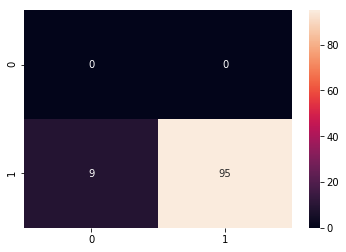

In [26]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_act), annot=True)

In [27]:
whois.whois('http://aot.edu.in/')

{'domain_name': 'aot.edu.in',
 'registrar': 'ERNET India',
 'registrar_url': 'http://www.ernet.in',
 'registrar_iana': '800068',
 'updated_date': datetime.datetime(2015, 4, 6, 10, 19, 29),
 'creation_date': datetime.datetime(2008, 5, 29, 7, 53, 27),
 'expiration_date': datetime.datetime(2024, 5, 29, 7, 53, 27),
 'name_servers': ['ns8238.hostgator.com', 'ns8237.hostgator.com'],
 'organization': 'Academy Of Technology',
 'state': 'West Bengal',
 'status': 'ok http://www.icann.org/epp#OK',
 'emails': None,
 'country': 'IN',
 'dnssec': 'unsigned'}

In [6]:
whois.whois('http://www.pamelynferdin.com/')

{'domain_name': ['PAMELYNFERDIN.COM', 'pamelynferdin.com'],
 'registrar': '1&1 IONOS SE',
 'whois_server': 'whois.ionos.com',
 'referral_url': None,
 'updated_date': [datetime.datetime(2019, 10, 14, 7, 45, 2),
  datetime.datetime(2018, 10, 5, 19, 19, 14)],
 'creation_date': datetime.datetime(1999, 10, 13, 21, 36, 22),
 'expiration_date': datetime.datetime(2020, 10, 13, 21, 36, 22),
 'name_servers': ['NS1056.UI-DNS.BIZ',
  'NS1075.UI-DNS.DE',
  'NS1076.UI-DNS.ORG',
  'NS1110.UI-DNS.COM'],
 'status': ['clientTransferProhibited https://icann.org/epp#clientTransferProhibited',
  'clientTransferProhibited https://www.icann.org/epp#clientTransferProhibited'],
 'emails': ['abuse@ionos.com', 'dataprivacyprotected@1und1.de'],
 'dnssec': ['unsigned', 'Unsigned'],
 'name': 'REDACTED FOR PRIVACY',
 'org': '1&1 Internet Inc',
 'address': 'REDACTED FOR PRIVACY',
 'city': 'REDACTED FOR PRIVACY',
 'state': 'PA',
 'zipcode': 'REDACTED FOR PRIVACY',
 'country': 'US'}

In [9]:
# To check Domain name is included in the url

def abnormal_url_sub(domain,url):
    try:
        try:
            hostname=domain["domain_name"].lower()
        except:
            hostname=domain["domain_name"][0].lower()
    except:
        return 1
    
    #print(hostname)
    match=re.search(hostname,url)
    if match:
        #print(0)
        return 0
    else:
        #print(1)
        return 1
    
def abnormal_url_main(url):
    dns = 0
    try:
        domain_name = whois.whois(url)
        # print(domain_name["domain_name"])
    except:
        dns = 1
        print('1dns')
        
    if dns == 1:
        return 1
    else:
        return abnormal_url_sub(domain_name,url)
site= input()
abnormal_url_main(site)

http://aot.edu.in/
1dns


1

In [11]:
# Domain Registration Length
import whois
from datetime import datetime
import time
def domain_registration_length_sub(domain):
    expiration_date = domain.expiration_date
    today = time.strftime('%Y-%m-%d')
    today = datetime.strptime(today, '%Y-%m-%d')
        
    if expiration_date is None:
        return 0
            
    else:
        if type(expiration_date) is list :
#                 print(expiration_date[0])
            expiration_date= expiration_date[0]
#             print(today[0])
#             return -1             #If it is a type of list then we can't select a single value from list. So,it is regarded as suspected website  
        if type(today) is list:
            today= today[0]
#                 print(today[0])
            
        registration_length = abs((expiration_date - today).days)
    #         if registration_length>3000:
    #             registration_length=0
        return int(registration_length/30)
    #         if registration_length / 365 <= 1:
    #             return 1
    #         else:
    #             return 0

def domain_registration_length_main(domain):
    dns = 0
    try:
        domain_name = whois.whois(domain)
    except:
        dns = 1
        print('x')

    if dns == 1:
        print("none")
        return 0
    else:
        return domain_registration_length_sub(domain_name)

site=input()
domain_registration_length_main(site)

AttributeError: module 'whois' has no attribute 'whois'
x
none


0

In [20]:
whois.whois('pythonforbeginners.com’)

SyntaxError: EOL while scanning string literal (<ipython-input-20-1690f63a03e1>, line 1)

In [6]:
def abnormal_url_sub(domain,url):
    hostname=domain.name
    match=re.search(hostname,url)
    if match:
        return 0
    else:
        return 1
    
def abnormal_url_main2(domain):
    dns = 0
    try:
        domain_name = whois.whois(domain)
    except:
        dns = 1
        
    if dns == 1:
        return 1
    else:
        return abnormal_url_sub(domain_name,domain)
    
site=input()
abnormal_url_main2(site)

abnormal_url_main2


1

In [ ]:
pip uninstall whois 

In [12]:
import whois
whois.whois('https://bit.ly/2CRIxHs')

{'domain_name': 'bit.ly',
 'registrar': None,
 'whois_server': None,
 'referral_url': None,
 'updated_date': None,
 'creation_date': None,
 'expiration_date': None,
 'name_servers': None,
 'status': 'Strings shorter than four symbols long are to be registered directly under .ly ONLY through Libya Telecom and Technology co. (LTT) in the upcoming period to guarantee that registrants have Local presence.',
 'emails': None,
 'dnssec': None,
 'name': None,
 'org': None,
 'address': None,
 'city': None,
 'state': None,
 'zipcode': None,
 'country': None}